In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 


In [133]:
data = np.loadtxt("Manchas_solares.dat")
manchas_solares = data[:,3]

años=data[:,0]


manchas_1900=manchas_solares[3480:]
años_1900=años[3480:]


lista_años=[]
variable=0
contador=0
for i in range(1152):
    
    
    if contador<12:
        
        variable=años_1900[i] + contador/12
        lista_años.append(variable)
        contador+=1
        
    if contador==12:
        contador=0
            
             
    
    


## Ahora quitamos el valor medio de los datos

In [134]:
arr_manchas=np.array(manchas_1900)
arr_solares=arr_manchas-np.mean(arr_manchas)


fft=np.fft.fft(arr_solares)
Npuntos=len(arr_solares)

Frecuencias=np.fft.fftfreq(Npuntos,1)


F_año=[]
espectro_frecuencias=[]
ii=0
contador_=0
for ken in Frecuencias:
    
    if contador_<12:
        
        F_año.append(ken)
        contador_+=1
        
    if contador_==12:
        
        ii=np.argmax(F_año)
        espectro_frecuencias.append(F_año[ii])
        contador_=0
        F_año=[]
        

        
        
    


## periodo por año

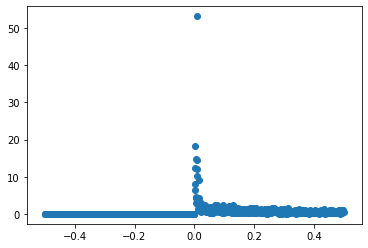

In [135]:
arr_perido=np.array(espectro_frecuencias)
arr_perido_=1/arr_espectro
mask=Frecuencias<0
fft[mask]=0
plt.scatter(Frecuencias,2*np.abs(fft/Npuntos))

In [136]:
ii_=np.argmax(np.abs(fft))
f_dominante=Frecuencias[ii]
periodo_dominante=(1/f_dominante)/12.0
print(periodo_dominante)

8.727272727272728


In [137]:
ii_mayor=np.abs(Frecuencias)>f_dominante
ii_menor=np.abs(Frecuencias)<f_dominante

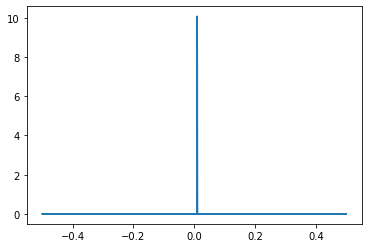

In [138]:
fft[ii_menor|ii_mayor]=0
plt.plot(Frecuencias,2*np.abs(fft)/Npuntos)



## Ahora calculamos la función inversa


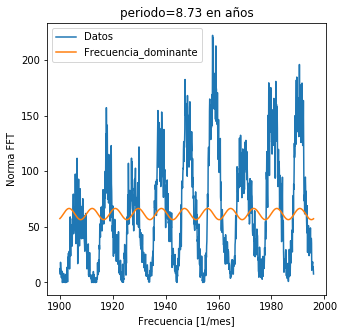

In [140]:
fig=plt.figure(figsize=(5,5))
plt.subplot(1,1,1)

plt.title("periodo=" +str(round(periodo_dominante,2)) + " en años")

inversa_fft=np.fft.ifft(fft)
plt.plot(lista_años,arr_manchas,label="Datos")
plt.plot(lista_años,np.real(inversa_fft)+np.mean(manchas_1900),label="Frecuencia_dominante")
plt.legend()
plt.xlabel("Frecuencia [1/mes]")
plt.ylabel("Norma FFT")

plt.savefig("periodoManchas.pdf")